### Credit Score Fraud Detection Study

#### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn 

#### Loading the dataset

In [3]:
# Read the tab-separated file into a DataFrame
file_path = r'fraud_detection_dataset.csv'
df_0 = pd.read_csv(file_path)

In [4]:
df_0

,account_open_date,age,location,occupation,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,...,number_of_delinquent_accounts,number_of_defaulted_accounts,earliest_credit_account,recent_trade_activity,new_accounts_opened_last_12months,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag
0,11/9/2023,56,Los Angeles,Teacher,40099,424.0,108,True,10,3.139572,...,4.0,2,9/11/2018,3/7/2024,3,True,True,False,False,True
1,9/11/2022,69,New York,Engineer,2050,483.0,0,False,1,1.017489,...,3.0,2,3/8/2023,1/28/2024,3,False,True,False,False,False
2,7/12/2020,46,Miami,Engineer,71936,566.0,0,False,1,1.508626,...,2.0,0,4/26/2024,10/3/2024,2,False,False,False,False,False
3,8/13/2024,32,Houston,Banker,15833,NaN,97,True,5,2.995150,...,3.0,1,9/14/2023,10/14/2024,4,False,True,True,False,False
4,7/27/2024,60,Houston,Lawyer,8574,787.0,0,False,1,1.182380,...,NaN,0,11/8/2022,9/2/2024,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,4/10/2021,33,Boston,Consultant,14566,589.0,92,True,2,1.727134,...,3.0,2,11/29/2017,8/24/2024,1,True,True,True,False,False
6996,3/18/2022,66,Atlanta,Banker,8930,679.0,0,True,1,1.430593,...,0.0,0,3/20/2020,9/12/2024,0,False,False,True,False,False
6997,6/20/2024,68,Houston,Other,4501,321.0,58,True,1,1.750392,...,4.0,2,8/7/2015,2/11/2024,4,False,True,False,False,False
6998,10/4/2020,35,Chicago,Retail Worker,11938,729.0,0,False,1,1.518169,...,0.0,0,7/4/2019,4/17/2024,0,False,False,False,False,False


In [5]:
df_0.columns

Index(['account_open_date', 'age', 'location', 'occupation', 'income_level',
       'fico_score', 'delinquency_status', 'charge_off_status',
       'number_of_credit_applications', 'debt_to_income_ratio',
       'payment_methods_high_risk', 'max_balance', 'avg_balance_last_12months',
       'number_of_delinquent_accounts', 'number_of_defaulted_accounts',
       'earliest_credit_account', 'recent_trade_activity',
       'new_accounts_opened_last_12months',
       'multiple_applications_short_time_period', 'unusual_submission_pattern',
       'applications_submitted_during_odd_hours', 'watchlist_blacklist_flag',
       'public_records_flag'],
      dtype='object')

In [6]:
df_0[['account_open_date',
       'earliest_credit_account', 'recent_trade_activity','charge_off_status']]

,account_open_date,earliest_credit_account,recent_trade_activity,charge_off_status
0,11/9/2023,9/11/2018,3/7/2024,True
1,9/11/2022,3/8/2023,1/28/2024,False
2,7/12/2020,4/26/2024,10/3/2024,False
3,8/13/2024,9/14/2023,10/14/2024,True
4,7/27/2024,11/8/2022,9/2/2024,False
...,...,...,...,...
6995,4/10/2021,11/29/2017,8/24/2024,True
6996,3/18/2022,3/20/2020,9/12/2024,True
6997,6/20/2024,8/7/2015,2/11/2024,True
6998,10/4/2020,7/4/2019,4/17/2024,False


In [7]:
#Creating seperate dataframes for the account open date(year-wise)

df_0['account_open_date'] = pd.to_datetime(df_0['account_open_date'])

df_0['account_open_date'].dt.year.unique() ##array([2023, 2022, 2020, 2024, 2021, 2019], dtype=int64)

df_0_2023 = df_0[df_0['account_open_date'].dt.year == 2023]
df_0_2022 = df_0[df_0['account_open_date'].dt.year == 2022]
df_0_2020 = df_0[df_0['account_open_date'].dt.year == 2022]
df_0_2024 = df_0[df_0['account_open_date'].dt.year == 2024]
df_0_2021 = df_0[df_0['account_open_date'].dt.year == 2021]
df_0_2019 = df_0[df_0['account_open_date'].dt.year == 2019]





# Descriptive Analysis

## Univariate Analysis filtered by the account open year

### Charge off status

In [8]:
def plot_charge_off_status_by_year(df_year, year, column_name='charge_off_status'):
    status_counts = df_year[column_name].value_counts()
    status_proportions = status_counts / len(df_year) * 100
    
    labels = status_counts.index
    sizes = status_counts.values
    
    plt.figure(figsize=(6, 6))
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140
    )
    plt.title(f'Charge Off Status Distribution for Accounts Opened in Year {year}')
    plt.show()

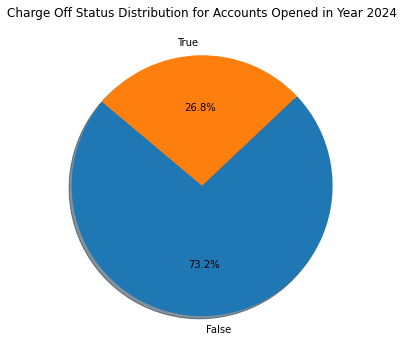

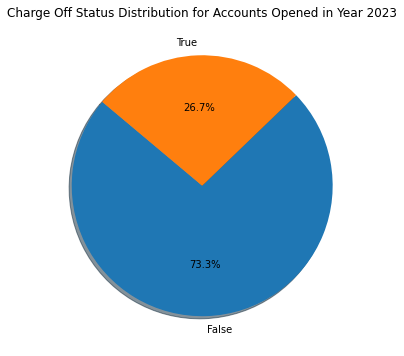

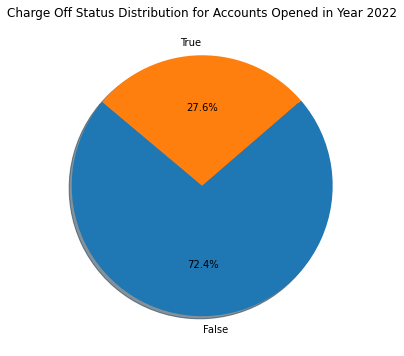

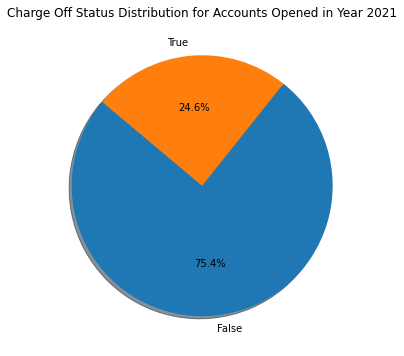

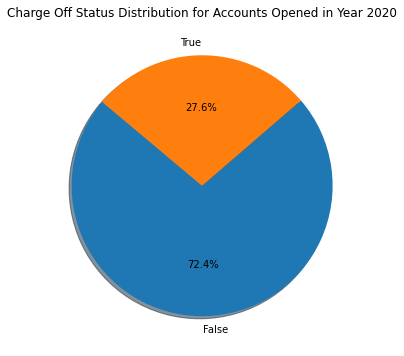

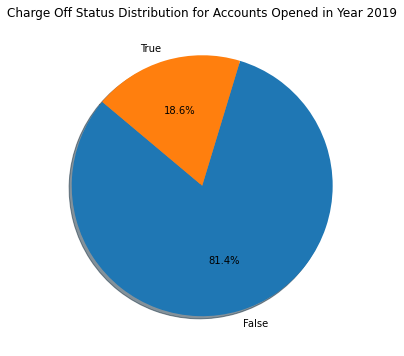

In [ ]:
#Charge Off Status Distribution for Accounts Opened in Year 2024
plot_charge_off_status_by_year(df_0_2024, 2024, column_name='charge_off_status')

#Charge Off Status Distribution for Accounts Opened in Year 2023
plot_charge_off_status_by_year(df_0_2023, 2023, column_name='charge_off_status')
2021, 2019

#Charge Off Status Distribution for Accounts Opened in Year 2022
plot_charge_off_status_by_year(df_0_2022, 2022, column_name='charge_off_status')

#Charge Off Status Distribution for Accounts Opened in Year 2021
plot_charge_off_status_by_year(df_0_2021, 2021, column_name='charge_off_status')

#Charge Off Status Distribution for Accounts Opened in Year 2020
plot_charge_off_status_by_year(df_0_2020, 2020, column_name='charge_off_status')

#Charge Off Status Distribution for Accounts Opened in Year 2019
plot_charge_off_status_by_year(df_0_2019, 2019, column_name='charge_off_status')



###  FICO SCORES


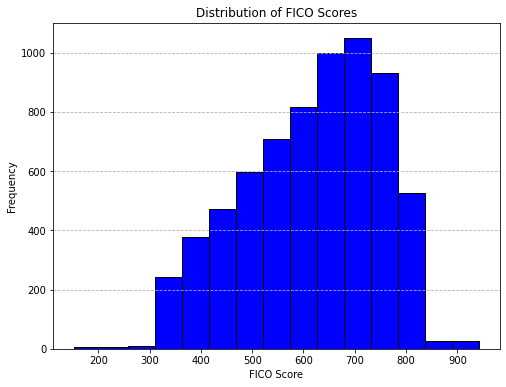

In [ ]:
#Overall
plt.figure(figsize=(8, 6))
plt.hist(
    df_0['fico_score'], 
    bins=15, 
    color='blue', 
    edgecolor='black')
plt.title('Distribution of FICO Scores')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [46]:
def plot_fico_score_by_year(df_year, year):
    plt.figure(figsize=(8, 6))
    plt.hist(
        df_year['fico_score'], 
        bins=15, 
        color='blue', 
        edgecolor='black')
    plt.xlabel('FICO Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--')
    plt.title(f'Distribution of Fico Scores for Accounts Opened in Year {year}')
    plt.show()

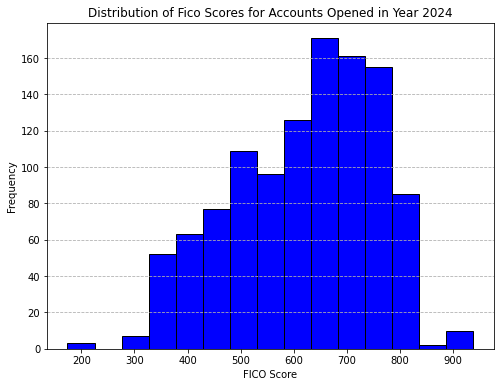

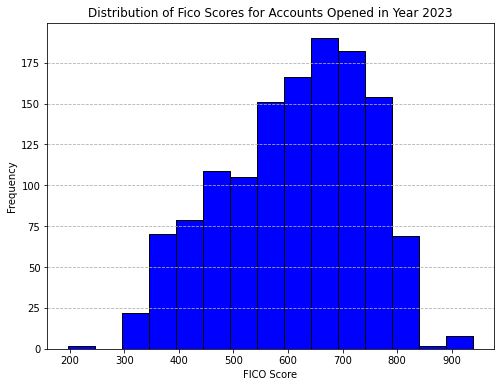

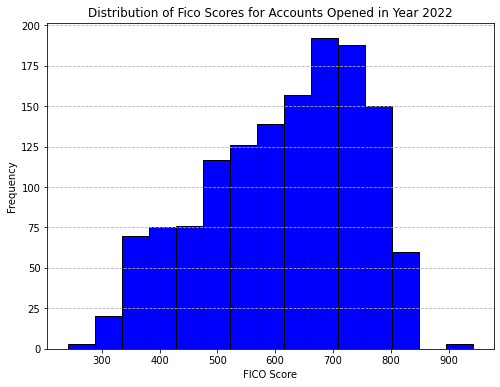

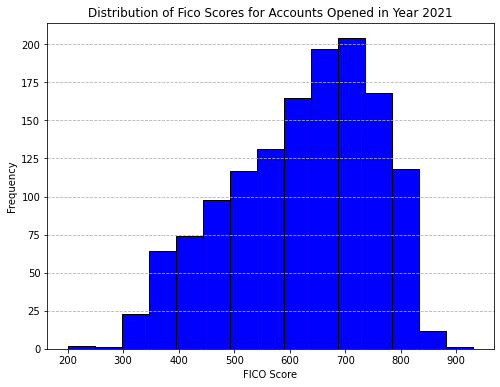

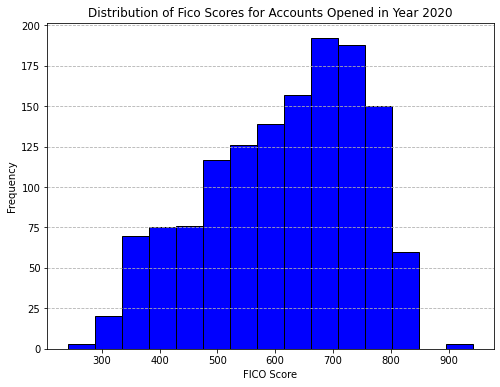

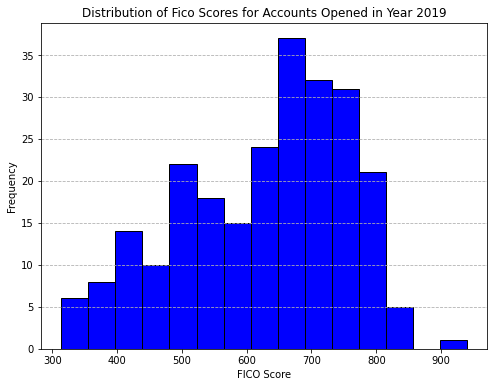

In [ ]:
#Fico Scores for Accounts Opened (Year Wise)
plot_fico_score_by_year(df_0_2024, 2024)
plot_fico_score_by_year(df_0_2023, 2023)
plot_fico_score_by_year(df_0_2022, 2022)
plot_fico_score_by_year(df_0_2021, 2021)
plot_fico_score_by_year(df_0_2020, 2020)
plot_fico_score_by_year(df_0_2019, 2019)



### Occupation

In [65]:
def plot_occupation_by_year(df_year, year, column_name='occupation'):
    status_counts = df_year[column_name].value_counts()
    status_proportions = status_counts / len(df_year) * 100
    
    labels = status_counts.index
    sizes = status_counts.values
    
    plt.figure(figsize=(18, 6))
    plt.bar(labels, sizes, width=0.8, bottom=None, align='center', data=df_year)
    plt.title(f'Distribution of Occupations of people who opened accounts in Year {year}')
    plt.show()

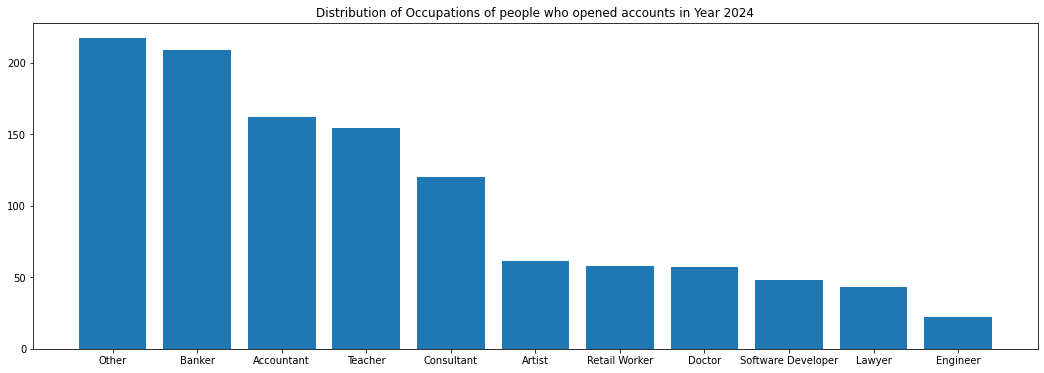

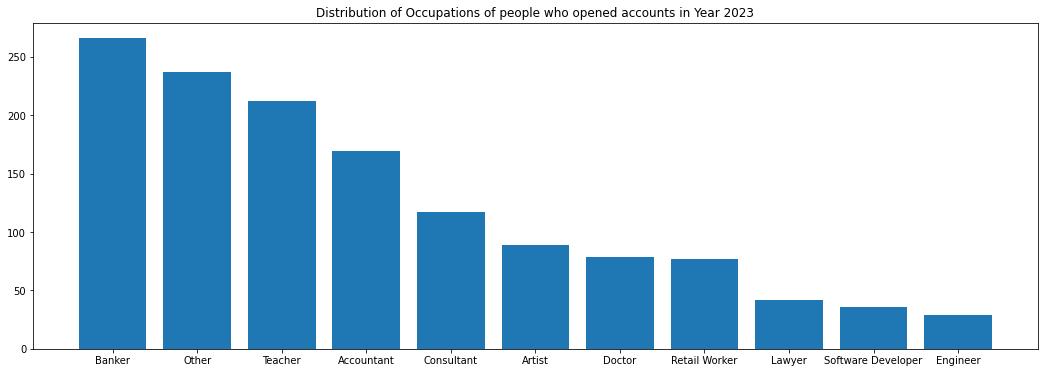

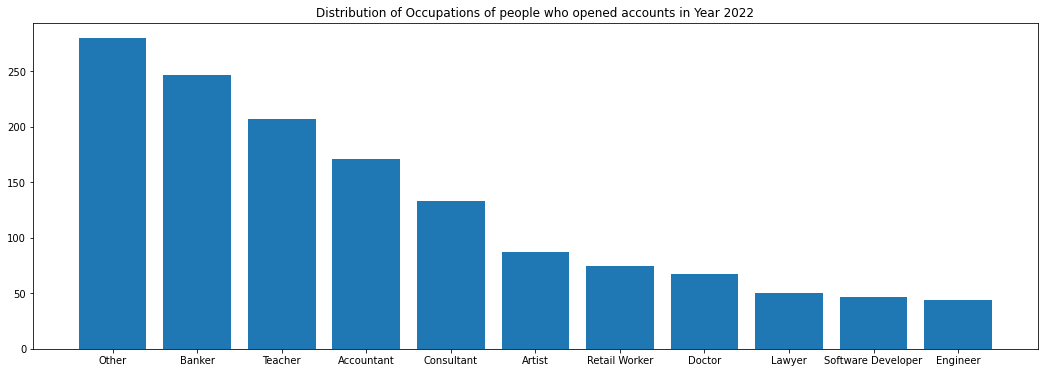

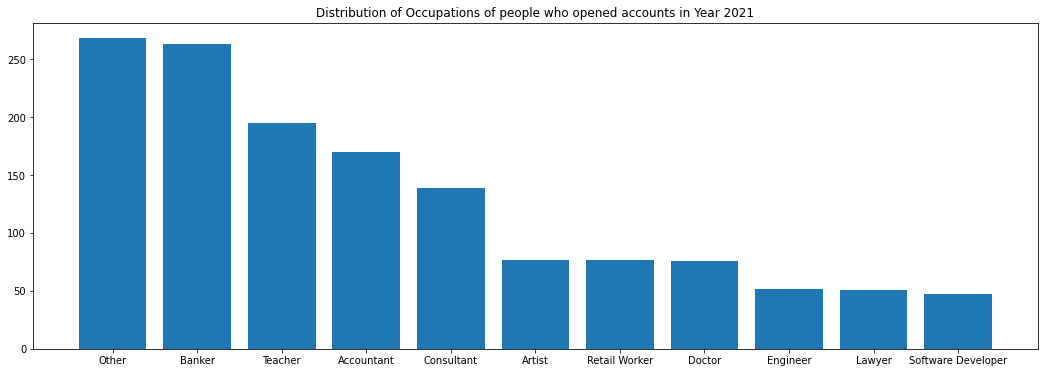

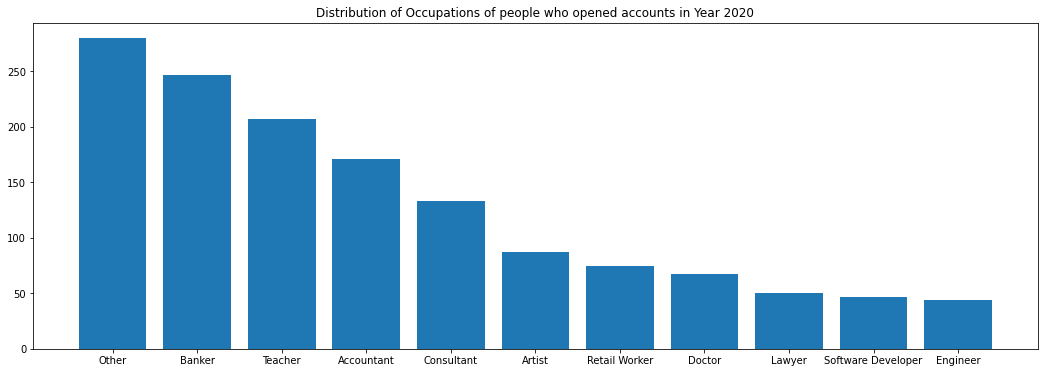

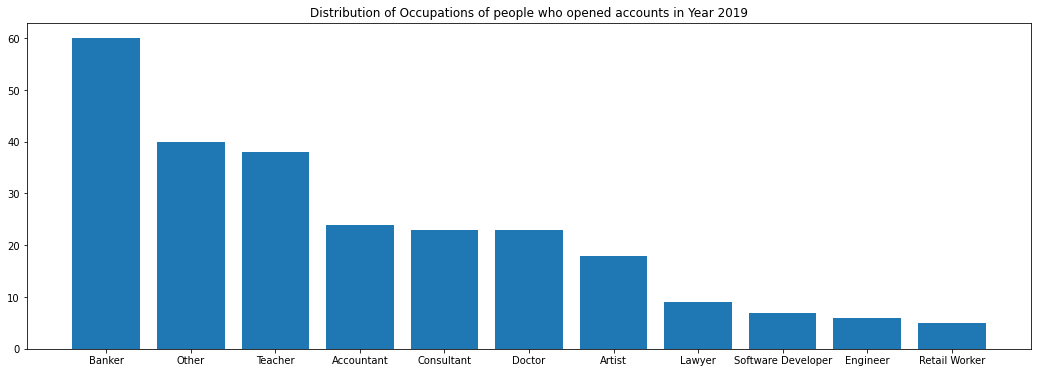

In [66]:
#Fico Scores for Accounts Opened (Year Wise)
plot_occupation_by_year(df_0_2024, 2024)
plot_occupation_by_year(df_0_2023, 2023)
plot_occupation_by_year(df_0_2022, 2022)
plot_occupation_by_year(df_0_2021, 2021)
plot_occupation_by_year(df_0_2020, 2020)
plot_occupation_by_year(df_0_2019, 2019)



###  Income_level

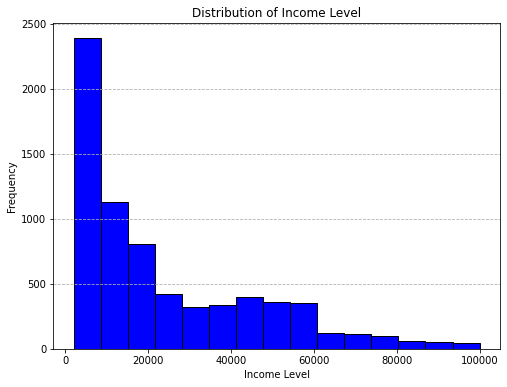

In [69]:
#Overall
plt.figure(figsize=(8, 6))
plt.hist(
    df_0['income_level'], 
    bins=15, 
    color='blue', 
    edgecolor='black')
plt.title('Distribution of Income Level')
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [70]:
def plot_income_level_by_year(df_year, year):
    plt.figure(figsize=(8, 6))
    plt.hist(
        df_year['income_level'], 
        bins=15, 
        color='blue', 
        edgecolor='black')
    plt.xlabel('Income Level')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--')
    plt.title(f'Distribution of Income Level of account openers in Year {year}')
    plt.show()

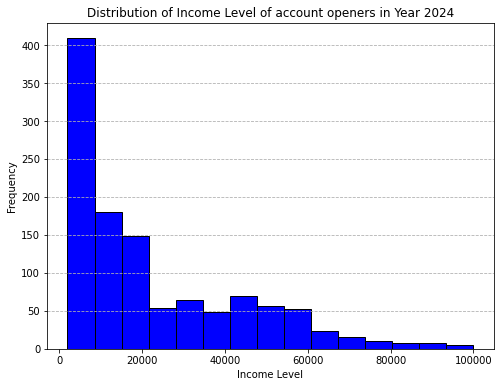

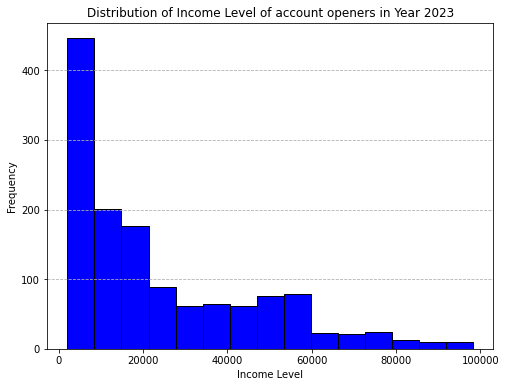

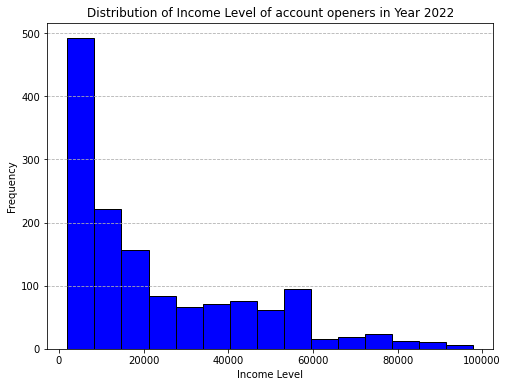

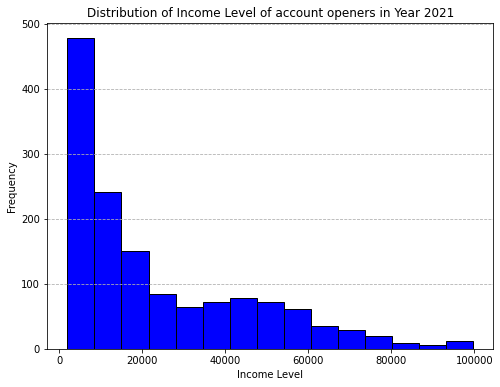

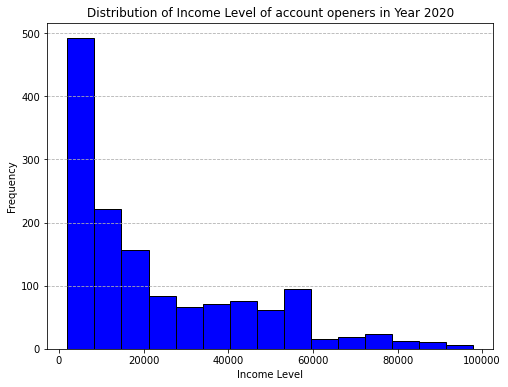

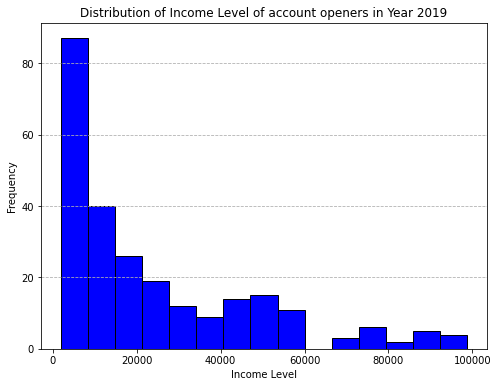

In [71]:
#Fico Scores for Accounts Opened (Year Wise)
plot_income_level_by_year(df_0_2024, 2024)
plot_income_level_by_year(df_0_2023, 2023)
plot_income_level_by_year(df_0_2022, 2022)
plot_income_level_by_year(df_0_2021, 2021)
plot_income_level_by_year(df_0_2020, 2020)
plot_income_level_by_year(df_0_2019, 2019)



### Location

In [67]:
def plot_location_by_year(df_year, year, column_name='location'):
    status_counts = df_year[column_name].value_counts()
    status_proportions = status_counts / len(df_year) * 100
    
    labels = status_counts.index
    sizes = status_counts.values
    
    plt.figure(figsize=(18, 6))
    plt.bar(labels, sizes, width=0.8, bottom=None, align='center', data=df_year)
    plt.title(f'Distribution of Account open branch locations in Year {year}')
    plt.show()

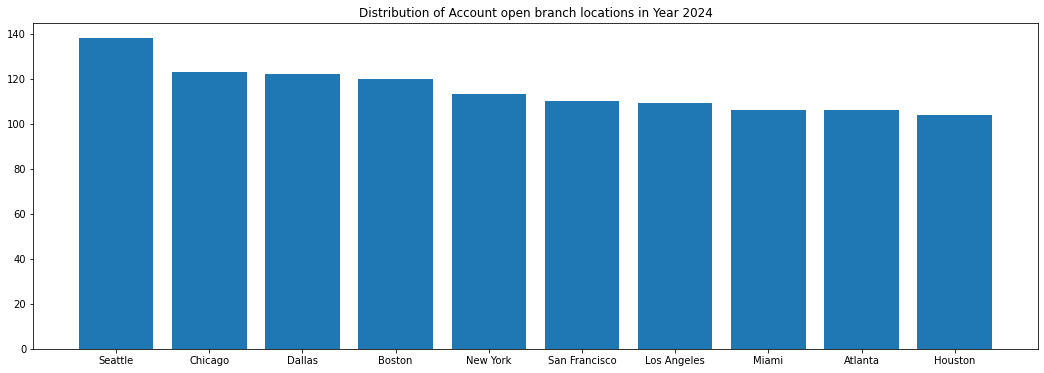

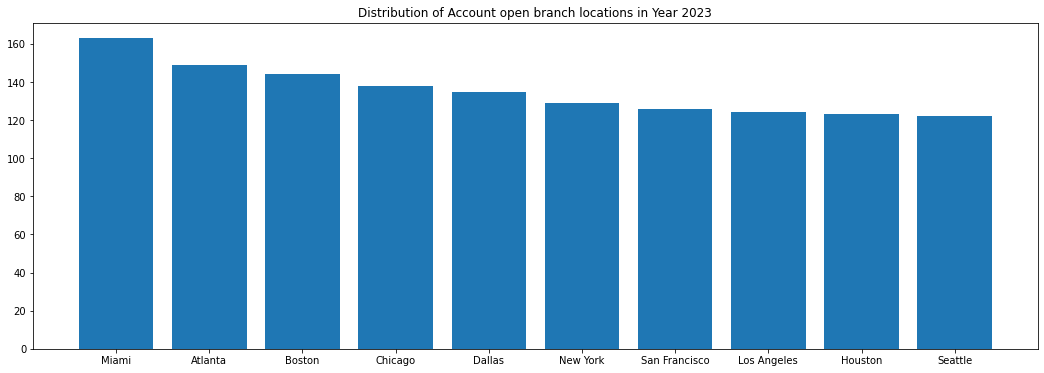

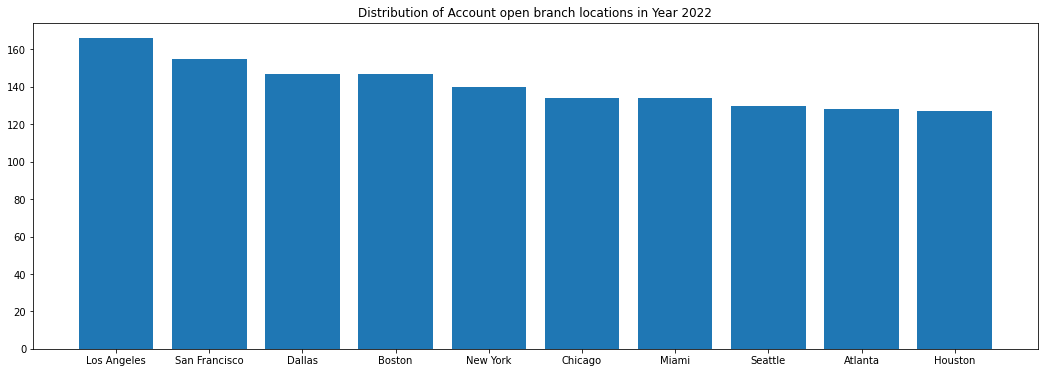

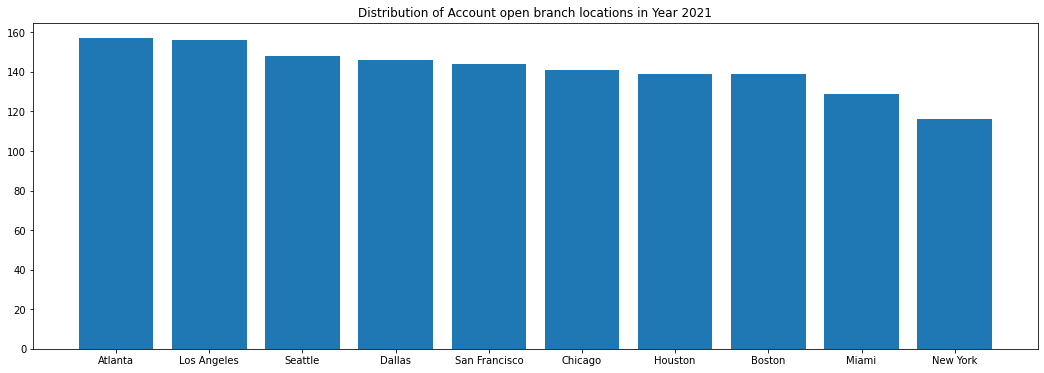

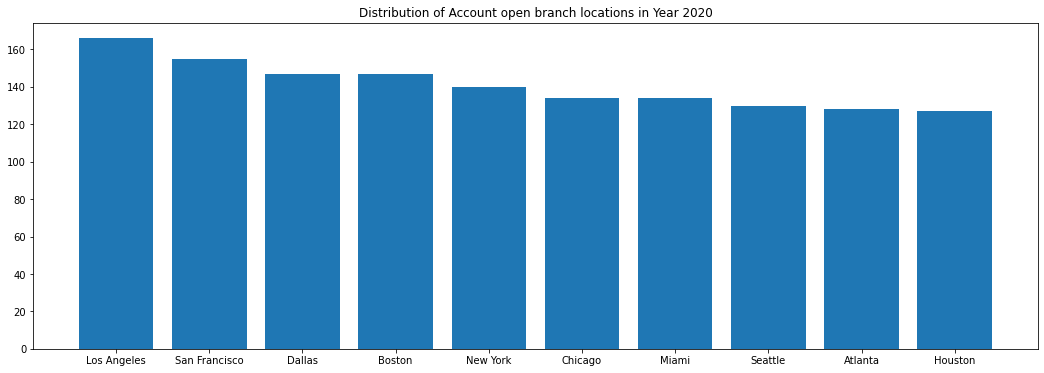

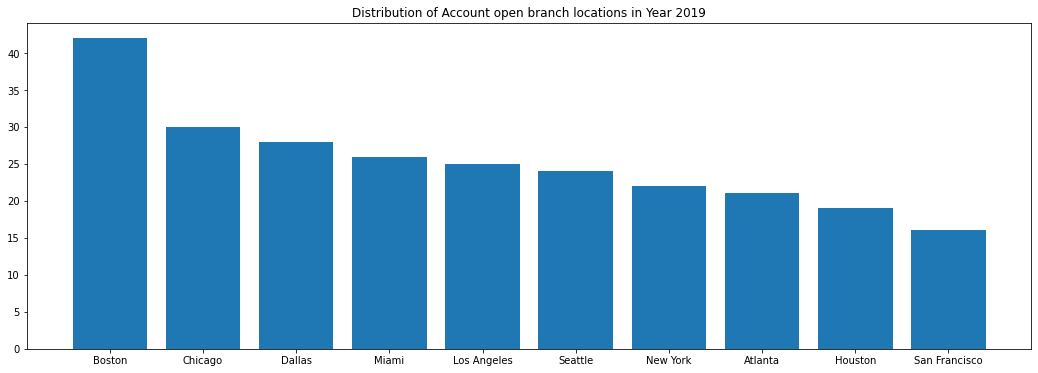

In [68]:
#Fico Scores for Accounts Opened (Year Wise)
plot_location_by_year(df_0_2024, 2024)
plot_location_by_year(df_0_2023, 2023)
plot_location_by_year(df_0_2022, 2022)
plot_location_by_year(df_0_2021, 2021)
plot_location_by_year(df_0_2020, 2020)
plot_location_by_year(df_0_2019, 2019)



## Earliest Credit Year vs Charge off Status

<Figure size 1000x600 with 0 Axes>

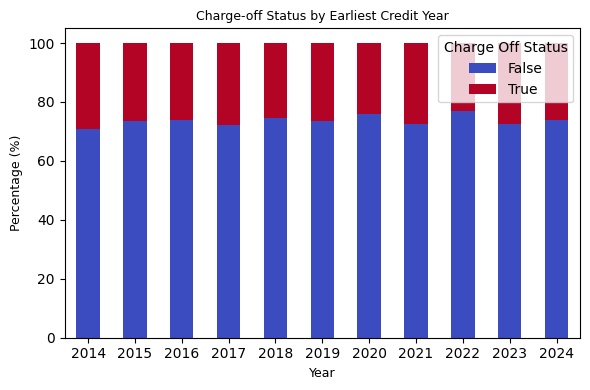

In [10]:
df_0['earliest_credit_account'] = pd.to_datetime(df_0['earliest_credit_account'])

# Group data by year and charge_off_status
df_0['year_eca'] = df_0['earliest_credit_account'].dt.year
agg_data = df_0.groupby(['year_eca', 'charge_off_status']).size().reset_index(name='count')

# Pivot for plotting
pivot_data = agg_data.pivot(index='year_eca', columns='charge_off_status', values='count').fillna(0)
pivot_data.columns = ['False', 'True']  # Rename columns for clarity

# Calculate percentages
pivot_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Plotting the percentage stacked bar chart
plt.figure(figsize=(10, 6))
pivot_percentage.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')

# Add labels and title
plt.title('Charge-off Status by Earliest Credit Year', fontsize=9)
plt.xlabel('Year', fontsize=9)
plt.ylabel('Percentage (%)', fontsize=9)
plt.xticks(rotation=0)
plt.legend(title='Charge Off Status', labels=['False', 'True'])
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

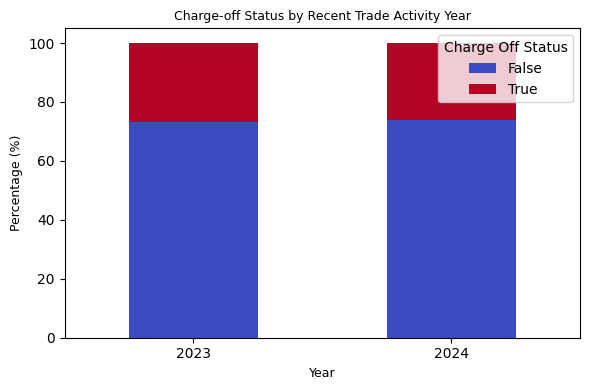

In [12]:
df_0['recent_trade_activity'] = pd.to_datetime(df_0['recent_trade_activity'])

# Group data by year and charge_off_status
df_0['year_rta'] = df_0['recent_trade_activity'].dt.year
agg_data = df_0.groupby(['year_rta', 'charge_off_status']).size().reset_index(name='count')

# Pivot for plotting
pivot_data = agg_data.pivot(index='year_rta', columns='charge_off_status', values='count').fillna(0)
pivot_data.columns = ['False', 'True']  # Rename columns for clarity

# Calculate percentages
pivot_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Plotting the percentage stacked bar chart
plt.figure(figsize=(10, 6))
pivot_percentage.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')

# Add labels and title
plt.title('Charge-off Status by Recent Trade Activity Year', fontsize=9)
plt.xlabel('Year', fontsize=9)
plt.ylabel('Percentage (%)', fontsize=9)
plt.xticks(rotation=0)
plt.legend(title='Charge Off Status', labels=['False', 'True'])
plt.tight_layout()
plt.show()